In [24]:
import yfinance as yf 
import matplotlib.pyplot as plt
import numpy as np
import datetime

import talib
import mpl_finance as mpf

In [25]:
now=datetime.datetime.now()
delta = datetime.timedelta(days=-365)
now = now + delta
now.strftime('%Y-%m-%d')

'2021-07-30'

#### NASDAQ 100

[*********************100%***********************]  1 of 1 completed


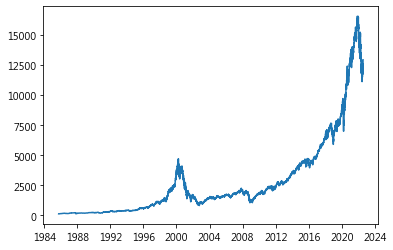

In [40]:
data = yf.download('^NDX',period='max',interval='1d')
# data = yf.download('^NDX',start='2021-07-29' ,end='2022-07-29',interval='1h')
plt.plot(data['Close'])
plt.show()

In [44]:
data.to_csv('../dataset/^NDX.csv')

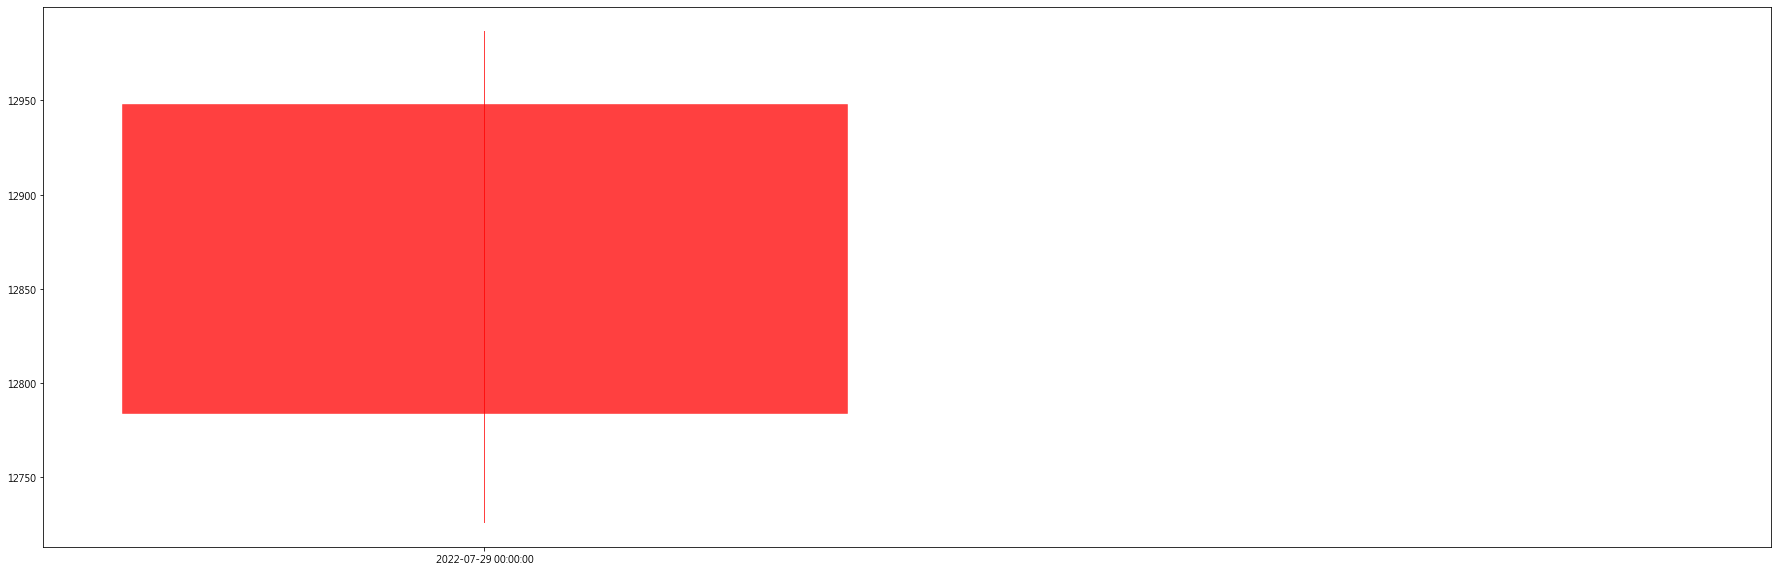

In [28]:
sma_10 = talib.SMA(np.array(data['Close']), 10)
sma_30 = talib.SMA(np.array(data['Close']), 30)

fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0,0.2,1,0.5])
# ax2 = fig.add_axes([0,0,1,0.2])
ax.plot(grid='True')
#使用 set_xticklabels來畫股票棒子 from talib
ax.set_xticks(range(0, len(data.index), 7))
ax.set_xticklabels(data.index[::7])
mpf.candlestick2_ochl(ax, data['Open'], data['Close'], data['High'],
                      data['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線') #藍色
ax.plot(sma_30, label='30日均線') #橘色

# #成交量
# mpf.volume_overlay(ax2, data['Open'], data['Close'], data['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
# ax2.set_xticks(range(0, len(data.index), 10))
# ax2.set_xticklabels(data.index[::10])

# ax.legend();
fig.savefig('plot.png')